In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


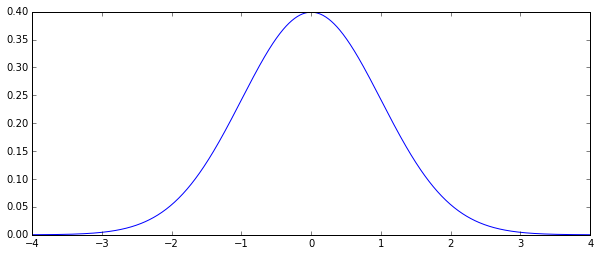

In [2]:
from scipy.stats import norm
figsize(10,4)
x = arange(-4, 4, 0.01)
plot(x, norm().pdf(x))

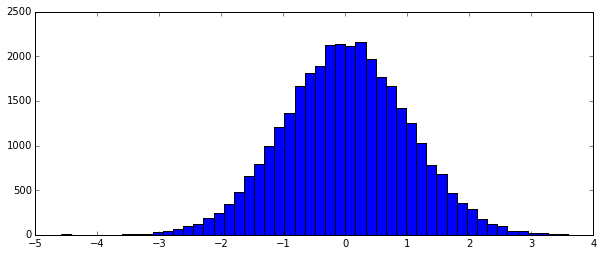

In [3]:
s = normal(size=(1024*32,))
a,b,c = hist(s, bins = 50)

In [4]:
def norm_pdf(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.e**(-(x-mu)**2/2*sigma**2)

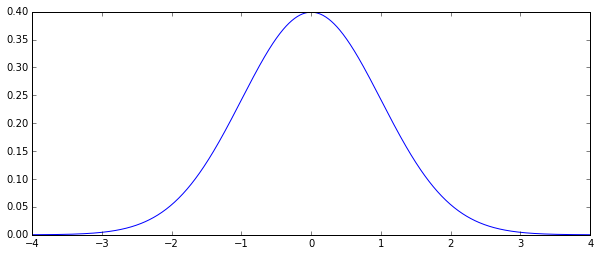

In [5]:
plot(x, norm_pdf(x, 0, 1))

In [6]:
def gen_pdf(mu, sigma):
    return lambda x: 1/(sigma*np.sqrt(2*np.pi))*np.e**(-(x-mu)**2/2*sigma**2)

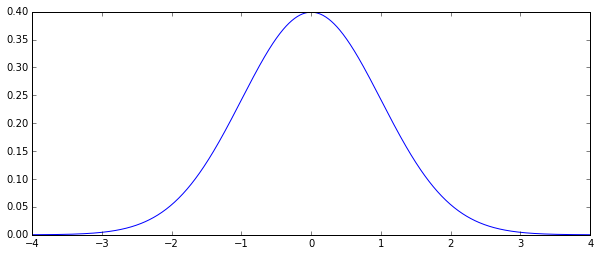

In [7]:
std_pdf = gen_pdf(0, 1)

plot(x, std_pdf(x))

## Regression Practice
Let's practice some regression using computational techniques. The first step is to make some data. Let's keep it super simple by using a $sin$ curve with error drawn from the normal distribution. Ie. Our data generating function will be $x = sin(x)+e$ where $ e$ is drawn from $\mathcal{N}(\mu, \sigma^2)$.

[[ 5.48813504  7.15189366  6.02763376  5.44883183  4.23654799  6.45894113
   4.37587211  8.91773001  9.63662761  3.83441519  7.91725038  5.2889492
   5.68044561  9.25596638  0.71036058  0.871293    0.20218397  8.32619846
   7.78156751  8.70012148  9.78618342  7.99158564  4.61479362  7.80529176
   1.18274426  6.39921021  1.43353287  9.44668917  5.21848322  4.1466194
   2.64555612  7.74233689  4.56150332  5.68433949  0.187898    6.17635497
   6.12095723  6.16933997  9.43748079  6.81820299  3.59507901  4.37031954
   6.97631196  0.60225472  6.66766715  6.7063787   2.10382561  1.28926298
   3.15428351  3.63710771]
 [-5.27576422  5.76825246 -1.77354759 -4.14238643 -5.69733432  1.65175219
  -6.33345047  2.21525342 -1.94680932 -2.80665506  4.47919086 -5.37234609
  -2.86268983  1.26838657  3.32705312  4.12828218  0.36972438  4.09006949
   4.31443577  2.95483823 -2.58109254  3.22645489 -4.79878062  4.59229348
   2.99804108  1.04160608  4.04567241 -0.05760189 -3.64413219 -4.09189861
   3.51911825

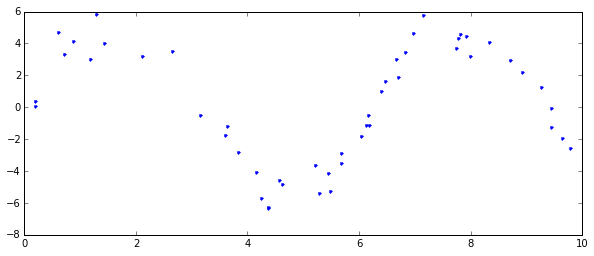

In [8]:
np.random.seed(0)
N = 50    #Number of samples
X = np.empty((2, N))
X[0] = np.random.rand(N)*10
X[1] = np.sin(X[0])*5+randn(N)
print(X)
plot(X[0], X[1], "b.")
#plot(X[0], np.sin(X[0])*5+np.random.laplace(0,1,N), "r.")    #not normal regression, just because I can.

In [92]:
# Actually there is some data from the statistics course located in "\stats play data". Let's try and access and play with the
# data because it's probably the best way to learn.

f = open("stats play data\marks.txt")

# I'm suprised, but it worked! Let's have a look at it.
marks = []

for line in f:
    marks.append(line.strip())

f.close()

print marks

['Mark', '69', '25', '13', '41', '35', '21', '75', '54', '32', '44', '50', '54', '72', '69', '42', '88', '61', '55', '54', '0', '52', '64', '80', '83', '85', '32', '48', '59', '71', '80', '48', '37', '65', '77', '61', '56', '4', '59', '48', '73', '35', '68', '71', '64', '63', '75', '54', '57', '65', '34', '60', '91', '0', '63', '29', '70', '85', '64', '83', '58', '59', '50', '54', '54', '92', '12', '38', '47', '55', '69', '48', '72', '53', '75', '70', '34', '50', '72', '47', '84', '53', '36', '70', '6', '56', '31', '62', '68', '94', '72', '57', '59', '40', '20', '63', '63', '65', '77', '11', '26', '22', '8', '81', '52', '51', '60', '79']


[0, 107, 0, 100]

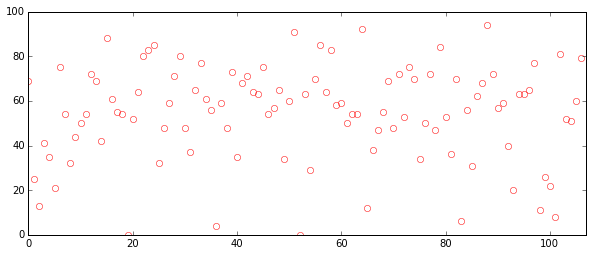

In [93]:
# Let's get some elementary measures here. First of all, visualise the data:
marks = [int(m) for m in marks[1:]]
plot(range(len(marks)), marks, "bo", mfc='none', mec='r')
axis([0, len(marks), 0, 100])

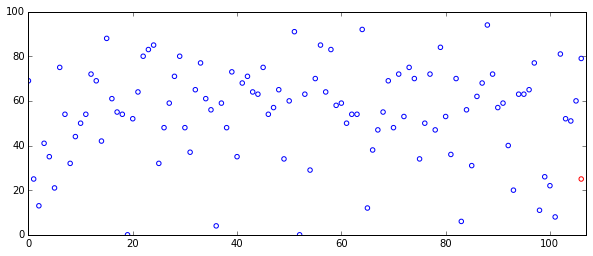

In [94]:
scatter(range(len(marks)), marks, facecolors='none', edgecolors='b')
axis([0, len(marks), 0, 100])
scatter(range(len(marks))[-1], marks[1], facecolors='none', edgecolors='r')    #See if the final value is in the shot.

In [117]:
# Looks like some people bombed that test. I wonder how it's distributed? Mean seems to be around 65-70. Let's see.
marks = np.array(marks)
print marks
marks_bar = np.mean(marks)
marks_var = np.var(marks)
marks_std = np.std(marks)
print "Mean: ", marks_bar
print "Count:", size(marks)
print "Max:  ", max(marks)
print "Min:  ", min(marks)
print "var:  ", marks_var
print "std:  ", marks_std

[69 25 13 41 35 21 75 54 32 44 50 54 72 69 42 88 61 55 54  0 52 64 80 83 85
 32 48 59 71 80 48 37 65 77 61 56  4 59 48 73 35 68 71 64 63 75 54 57 65 34
 60 91  0 63 29 70 85 64 83 58 59 50 54 54 92 12 38 47 55 69 48 72 53 75 70
 34 50 72 47 84 53 36 70  6 56 31 62 68 94 72 57 59 40 20 63 63 65 77 11 26
 22  8 81 52 51 60 79]
Mean:  54.5981308411
Count: 107
Max:   94
Min:   0
var:   457.268407721
std:   21.3838351967


107


[0.0, 100, 0.0, 6.0]

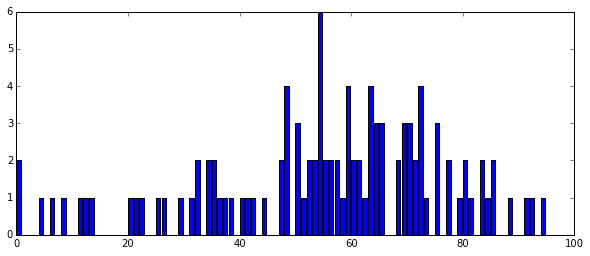

In [109]:
# Frequency count!

count = np.zeros(shape = marks.shape)
for m in marks:
    count[m]+=1
    
print marks.size

con = bar(range(marks.size), count)
axis([100 if i == 1 else axis()[i] for i in range(4)])

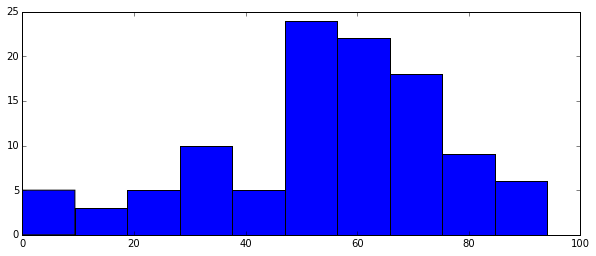

In [106]:
a,b,c = hist(marks)

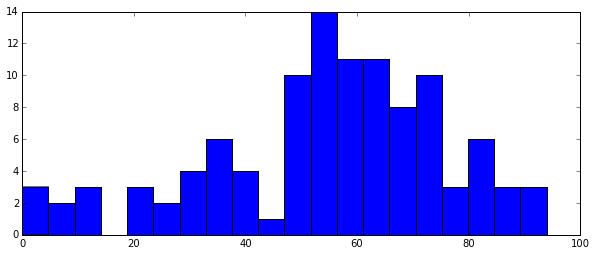

In [113]:
a,b,c = hist(marks, 20)

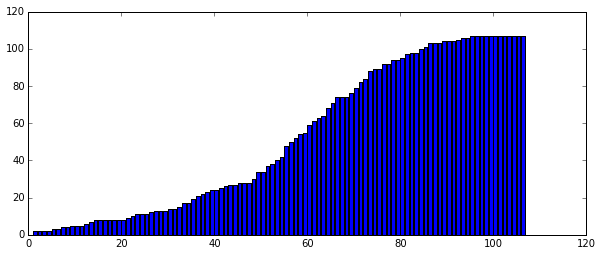

In [120]:
cumsum = [sum(count[:i]) for i in range(marks.size)]
con = bar(range(marks.size), cumsum)